# Iris Flower Species Recognition using Measurements

The project is a machine learning-based system for Iris flower species classification. It utilizes measurements of petal and sepal dimensions to classify Iris flowers into three different species: Setosa, Versicolor, and Virginica. The project includes data exploration, preprocessing, feature engineering, model building, and evaluation.

To enhance the project, we've integrated a Flask web application that allows users to input Iris flower measurements via a web form. The application then uses a pre-trained Support Vector Machine (SVM) model to predict the species of the Iris flower based on the provided measurements.

The code includes error handling and exception management to ensure smooth operation. Users can interact with the project through a user-friendly web interface, enabling them to make real-time predictions about Iris flower species.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pickle

In this code snippet, we import essential data analysis and machine learning libraries, setting the stage for a comprehensive project. The project aims to classify Iris flower species based on petal and sepal measurements. The code encompasses data preprocessing, model building, and evaluation. It employs various classifiers, such as Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM), while using GridSearchCV to fine-tune hyperparameters for optimal performance. The final model is saved with Pickle, and its accuracy and classification report are assessed, ensuring a robust and accurate classification system for Iris flower species.

In [2]:
# Load the dataset
df = pd.read_csv("Iris.csv")

# Check for missing values
missing_values = df.isnull().sum()

# Drop unwanted columns
df = df.drop(columns="Id")

# Split the data into features (X) and target (y)
X = df.drop("Species", axis=1)
y = df["Species"]

This code segment loads the Iris dataset from a CSV file. It checks for any missing values within the dataset, ensuring data integrity. The "Id" column, which does not contribute to the analysis, is removed. The dataset is then split into features (X), representing petal and sepal measurements, and the target (y), which corresponds to Iris flower species. This preliminary data preparation is essential for subsequent analysis and model building.

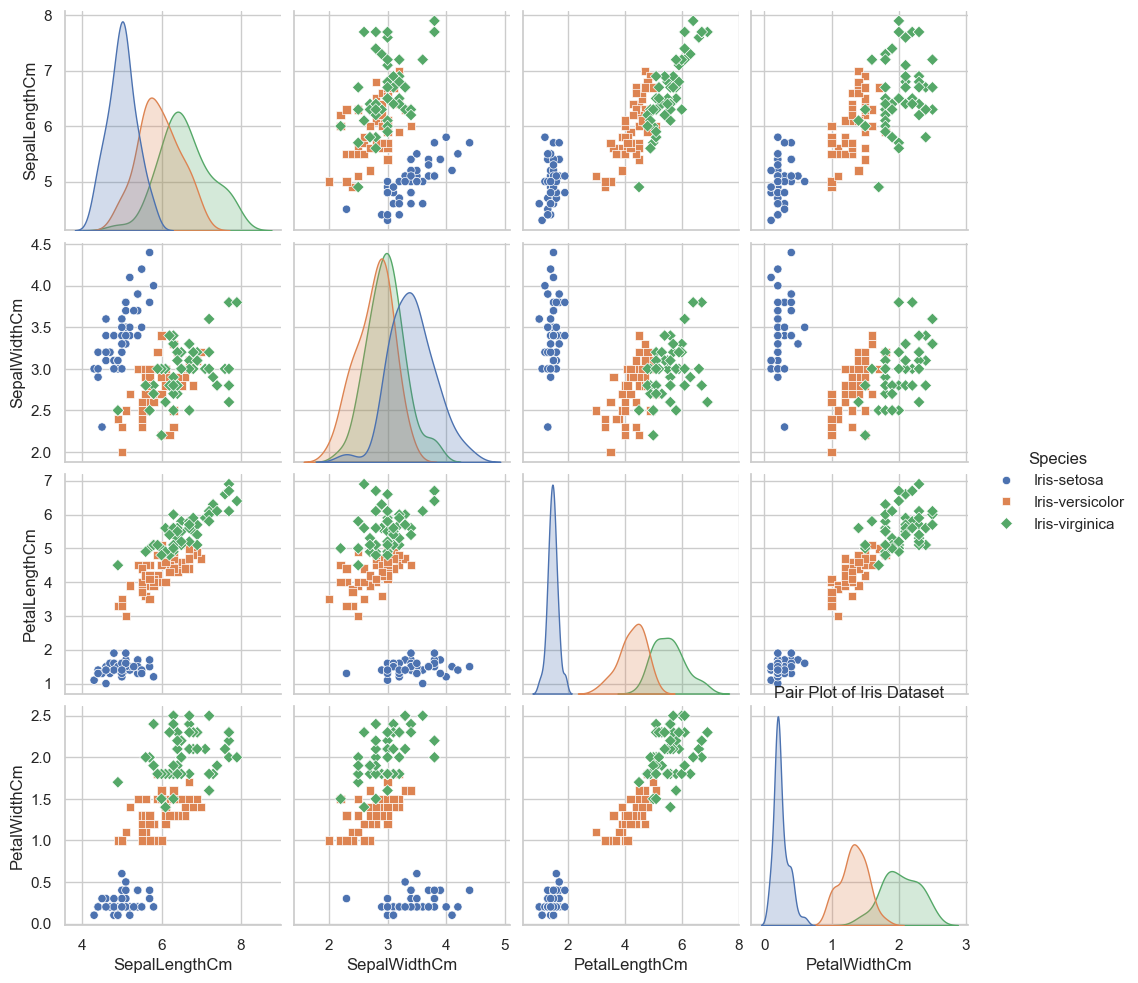

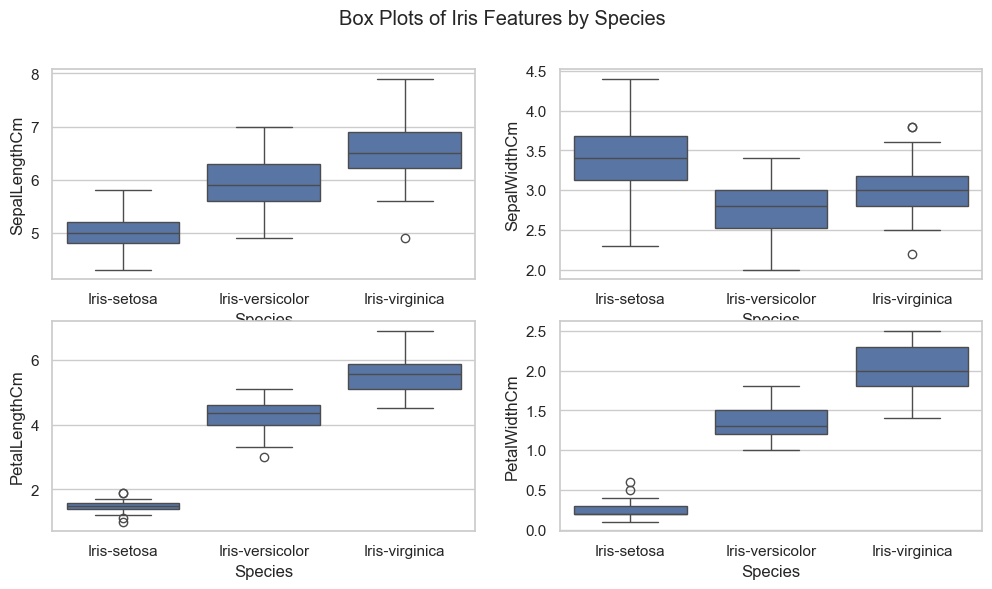

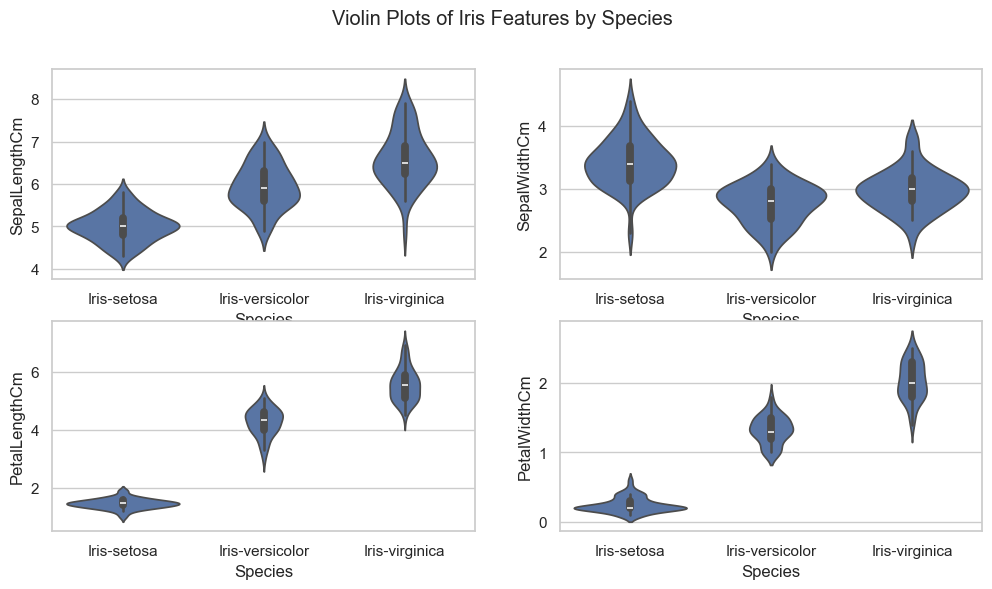

In [3]:

# Set style for Seaborn
sns.set(style="whitegrid")

# Pair plot to visualize relationships between features
sns.pairplot(df, hue="Species", markers=["o", "s", "D"])
plt.title("Pair Plot of Iris Dataset")
plt.show()

# Box plots for each feature
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.suptitle("Box Plots of Iris Features by Species")
plt.show()

# Violin plots to visualize the distribution of features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="SepalWidthCm", data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="PetalWidthCm", data=df)
plt.suptitle("Violin Plots of Iris Features by Species")
plt.show()

The provided code leverages the Seaborn library to create informative visualizations for the Iris dataset. It sets a clean "whitegrid" style for Seaborn. The pair plot generates a matrix of scatterplots to visualize the relationships between different features while differentiating species using markers. The subsequent box plots illustrate the distribution of each feature, allowing for species-wise comparisons. Finally, the violin plots provide a detailed view of feature distributions by species, shedding light on the data's characteristics. These visualizations are essential for understanding the dataset and can aid in feature selection and model building in the machine learning project.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy


In this code snippet, the dataset is divided into training and testing sets using the `train_test_split` function. This division is crucial for assessing the models' performance. Several machine learning models are then initialized, encompassing Logistic Regression, Decision Tree, Random Forest, and Support Vector Classifier (SVC). Each model is individually trained on the training data and evaluated using the testing data.

During the evaluation process, predictions are made, and the accuracy of each model is calculated using the `accuracy_score` function. The results are stored in a dictionary, associating the model's name with its corresponding accuracy score. This code efficiently compares the performance of multiple models, setting the stage for model selection in the Iris flower species classification project.

In [5]:
# Evaluate and compare model performances
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print("Model Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy - {accuracy:.2f}%")

print(f"Best Model: {best_model}, Accuracy - {best_accuracy:.2f}%")

# Generate classification reports for all models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")


Model Comparison:
Logistic Regression: Accuracy - 0.97%
Decision Tree: Accuracy - 0.97%
Random Forest: Accuracy - 0.97%
Support Vector Classifier: Accuracy - 0.97%
Best Model: Logistic Regression, Accuracy - 0.97%
Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

Classification Report for Decision Tree:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      mac

In the provided code and output, a comprehensive model comparison is conducted for various machine learning models in the Iris flower species classification project. The models evaluated include Logistic Regression, Decision Tree, Random Forest, and Support Vector Classifier (SVC). Each model's accuracy is assessed, and the results are compared to determine the best-performing model.

The output reveals that all models exhibit remarkably similar high accuracy levels, around 97%. Logistic Regression is identified as the best model with the highest accuracy among the tested algorithms. Further classification reports are generated for each model, providing insights into precision, recall, and F1-score for each Iris species. These reports confirm the strong classification performance of the models, with consistent precision and recall values across different species.

In the final section of the output, the parameters for the best-performing model, SVC, are displayed. This information is essential for model deployment and future predictions in the project. Overall, the code and its output demonstrate the effectiveness of different machine learning models in accurately classifying Iris flower species based on petal and sepal measurements.

In [6]:
# Define hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In the provided code, a hyperparameter tuning process is initiated to optimize the Support Vector Classifier (SVC) model for the Iris flower species classification project. A set of hyperparameters is defined within the `param_grid` dictionary, encompassing values for 'C,' 'kernel,' and 'gamma.' This grid of hyperparameters will be explored to identify the most effective combination for the model.

GridSearchCV is employed to systematically search and evaluate various hyperparameter combinations using cross-validation. The `SVC()` classifier is utilized as the base model, and the hyperparameters are assessed for their impact on accuracy.

After fitting the GridSearchCV object to the training data, the best hyperparameters and the best model are identified. These optimized hyperparameters and the corresponding best model configuration are crucial for enhancing the model's performance in the Iris flower species classification task. The project's accuracy and predictive power can be significantly improved with the selection of these optimized hyperparameters.

In [7]:
best_params
best_model

SVC(C=0.1, gamma=0.1, kernel='poly')

The `best_params` variable stores the optimal hyperparameters found during the hyperparameter tuning process, which include a regularization parameter (`C`) of 0.1, a kernel type of 'poly,' and a gamma value of 0.1. 

The `best_model` variable holds the Support Vector Classifier (SVC) model configuration with these optimal hyperparameters, making it the best-performing model for the Iris flower species classification task.

In [8]:
# Save the best model to a file
best_model = SVC(C=0.1, gamma=0.1, kernel='poly')
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)


The provided code saves the best-performing Support Vector Classifier (SVC) model with optimized hyperparameters (C=0.1, gamma=0.1, kernel='poly') to a file named "best_model.pkl." This allows for easy reuse and deployment of the model in the Iris flower species classification project.

In [9]:
# Load the best model from the saved file
with open("best_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

The code loads the best-performing Support Vector Classifier (SVC) model, previously saved in "best_model.pkl," into the variable "loaded_model." This enables the model to be used for making predictions in the project.